# Data SQL Manipulation

In [1]:
# import libraries
import pandas as pd
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

import sklearn as sk
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [2]:
file_name='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv'
df=pd.read_csv(file_name)
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


/Users/js/anaconda3/envs/SpaceX/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


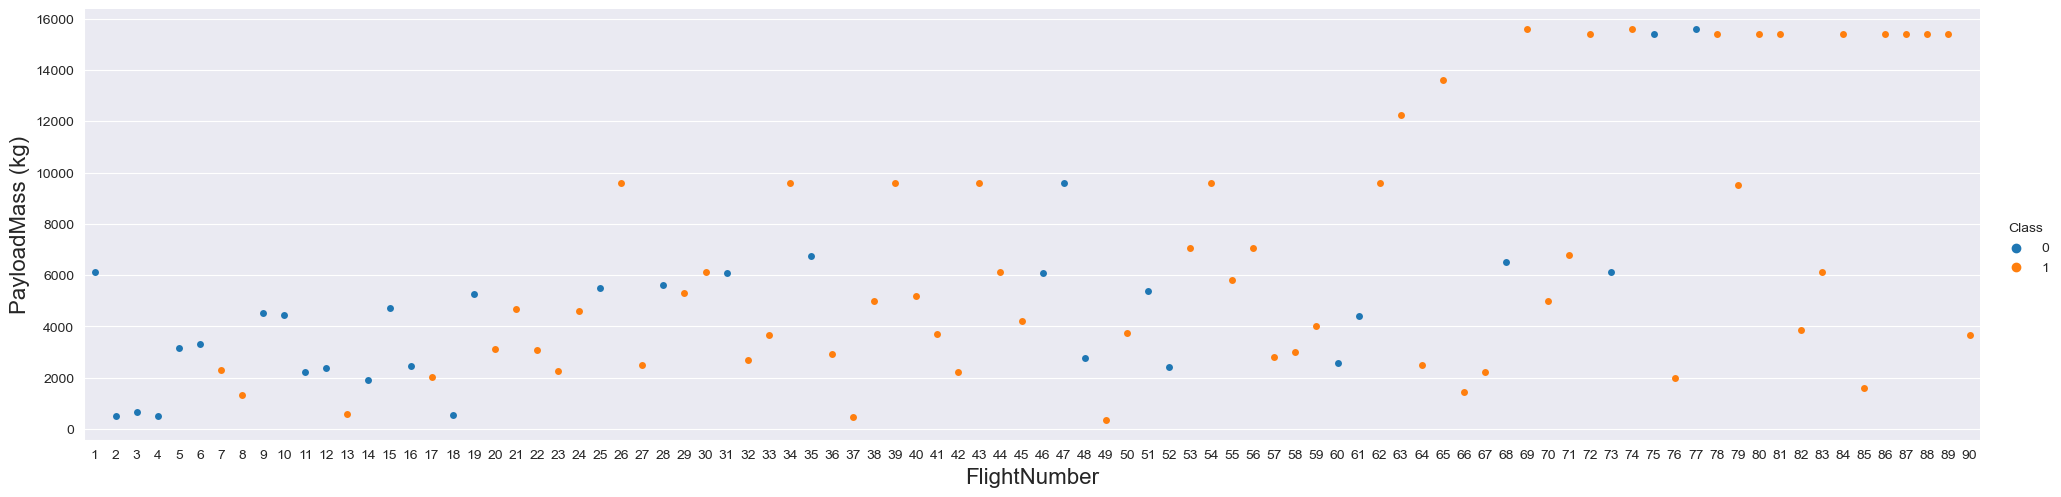

In [3]:
# check launch outcomes declined by FLightNumber and Payload
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 4)
plt.xlabel("FlightNumber",fontsize=16)
plt.ylabel("PayloadMass (kg)",fontsize=16)
plt.show()

As flight number increases, the first stage is more likely to land successfully. In addition, the more the payload, the less likely the first stage will land.

/Users/js/anaconda3/envs/SpaceX/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


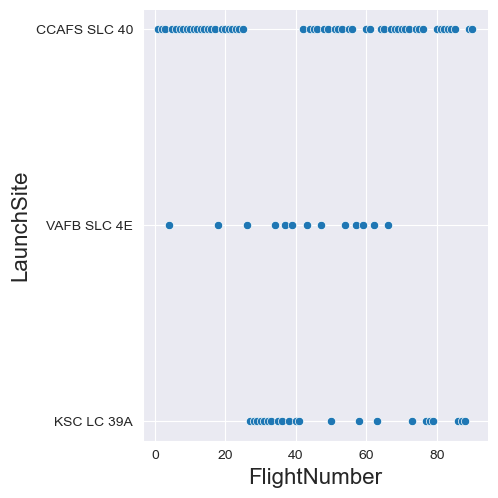

In [4]:
# relationship between flight number and launch site

sns.relplot(y="LaunchSite", x="FlightNumber", data=df)
plt.xlabel("FlightNumber",fontsize=16)
plt.ylabel("LaunchSite",fontsize=16)
plt.show()

/Users/js/anaconda3/envs/SpaceX/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


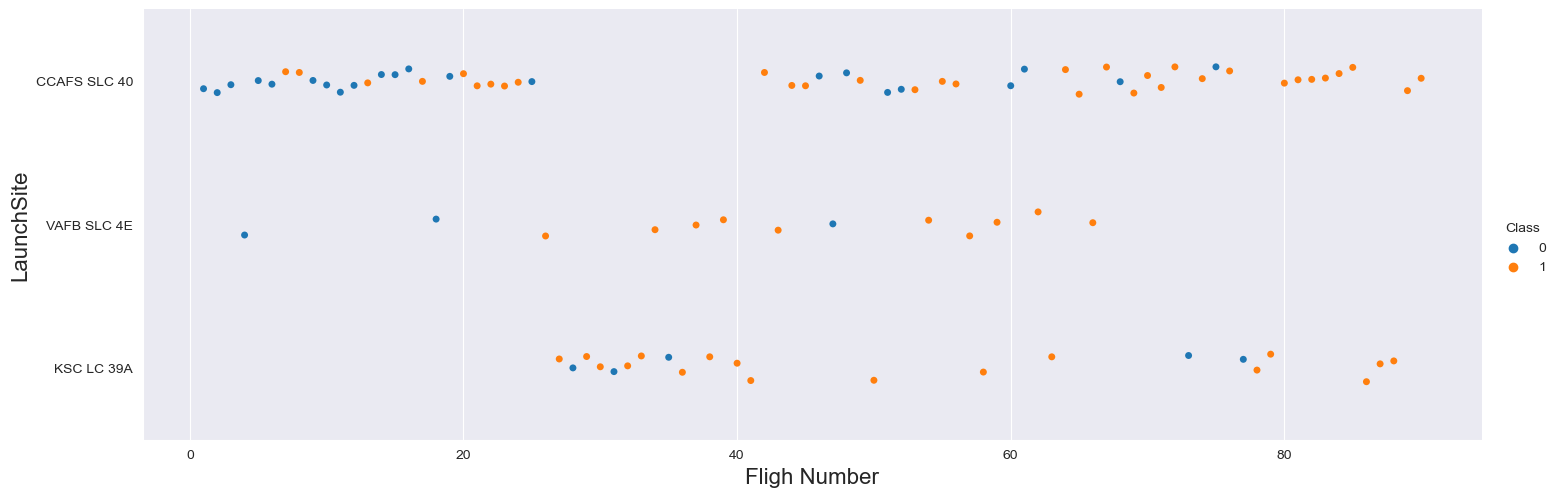

In [5]:
# chart plotting: flight number over launch site

sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df,aspect=3)
plt.xlabel("Fligh Number",fontsize=16)
plt.ylabel("LaunchSite",fontsize=16)
plt.show()

/Users/js/anaconda3/envs/SpaceX/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


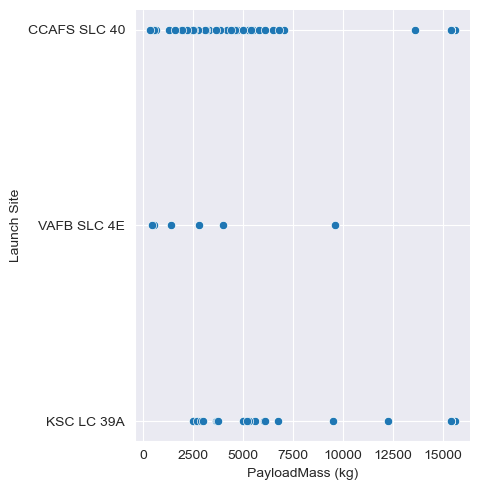

In [6]:
# relationship between payload mass and launch site

sns.relplot(y="LaunchSite", x="PayloadMass", data=df)
plt.xlabel("PayloadMass (kg)",fontsize=10)
plt.ylabel("Launch Site",fontsize=10)
plt.show()

/Users/js/anaconda3/envs/SpaceX/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


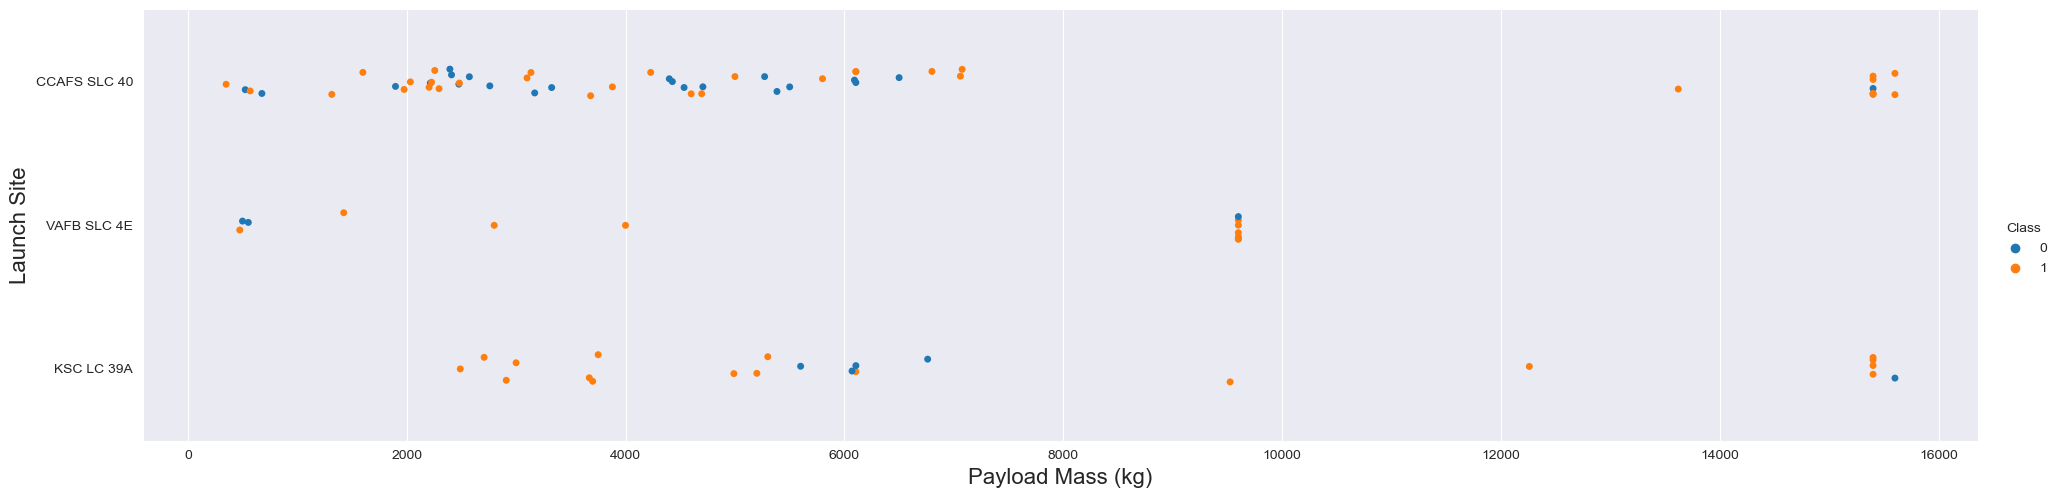

In [7]:
# chart plotting: payload mass over launch sites

sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df,aspect=4)
plt.xlabel("Payload Mass (kg)",fontsize=16)
plt.ylabel("Launch Site",fontsize=16)
plt.show()  

/Users/js/anaconda3/envs/SpaceX/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


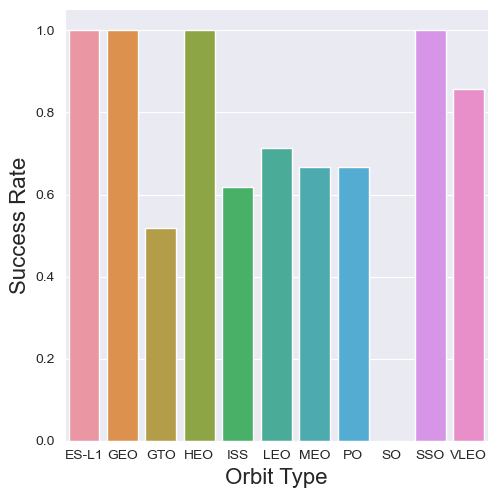

In [8]:
# visualize the relationship between orbit type & success rate

# using group by method on Orbit column to get the mean of Class column
sns.catplot(x= 'Orbit', y = 'Class', data = df.groupby('Orbit')['Class'].mean().reset_index(), kind = 'bar')
plt.xlabel('Orbit Type',fontsize=16)
plt.ylabel('Success Rate',fontsize=16)
plt.show()

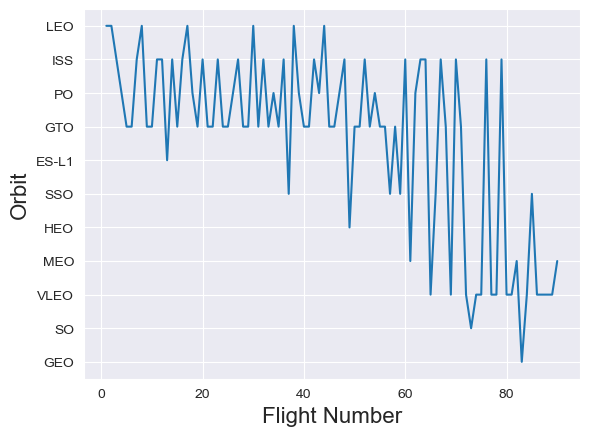

In [9]:
# visualize the relationship between orbit type & flights

sns.lineplot(y="Orbit", x="FlightNumber",data=df)
plt.xlabel("Flight Number",fontsize=16)
plt.ylabel("Orbit",fontsize=16)
plt.show()

/Users/js/anaconda3/envs/SpaceX/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


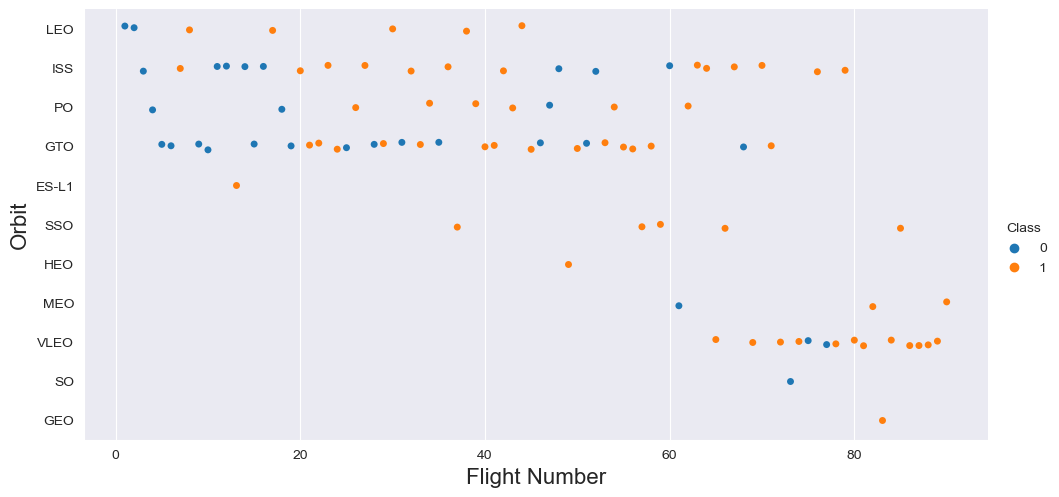

In [10]:
# scatter plotting with x = flight number and y = orbit

sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df,aspect=2)
plt.xlabel("Flight Number",fontsize=16)
plt.ylabel("Orbit",fontsize=16)
plt.show()

/Users/js/anaconda3/envs/SpaceX/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


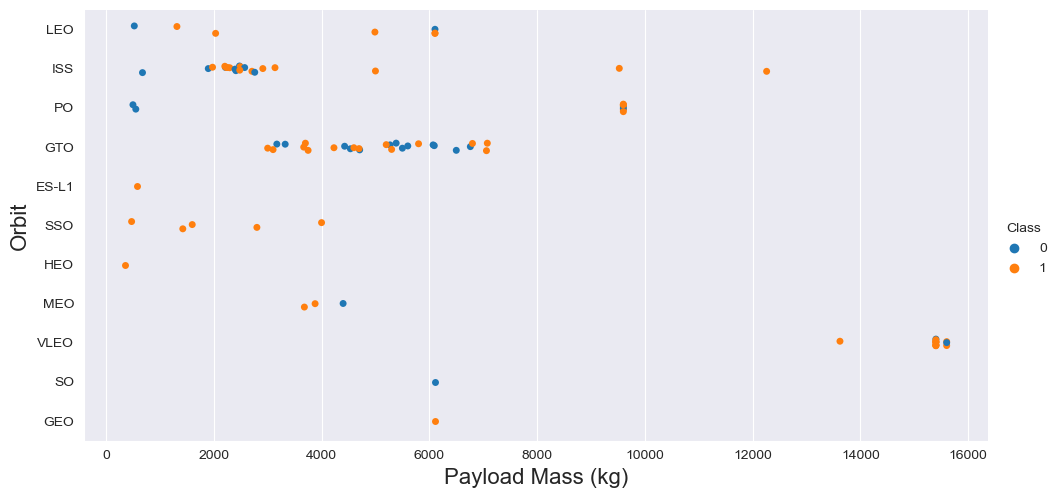

In [11]:
# Visualize the relationship between Payload and Orbit type

sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df,aspect=2)
plt.xlabel("Payload Mass (kg)",fontsize=16)
plt.ylabel("Orbit",fontsize=16)
plt.show()

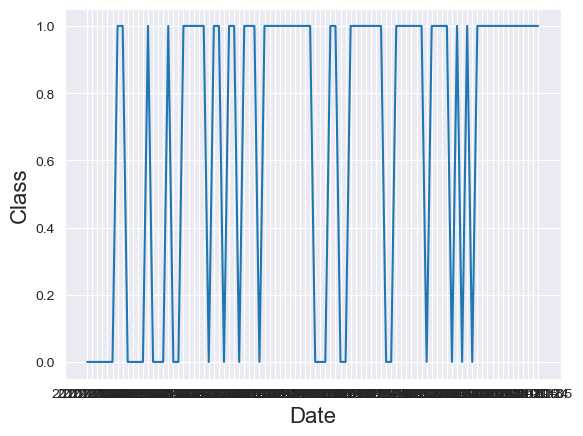

In [12]:
# visualize launch success yearly trend

sns.lineplot(y="Class", x="Date", data=df)
plt.xlabel("Date",fontsize=16)
plt.ylabel("Class",fontsize=16)
plt.show()

In [13]:
# function to extract years from the date 

year=[]

def year_extraction():
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

year_extraction()

df['Date'] = year
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


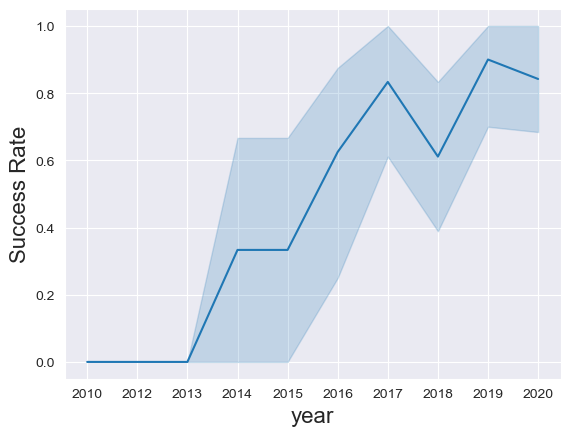

In [14]:
# chart plotting with x = extracted year, y = success rate

sns.lineplot(data=df, x="Date", y="Class")
plt.xlabel("year",fontsize=16)
plt.ylabel("Success Rate",fontsize=16)
plt.show()

In [15]:
# how variables affect success rate

features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6104.959412,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCAFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [16]:
# dummy variables to categorical columns

features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6104.959412,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,525.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,677.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,500.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3170.000000,1,False,False,False,1.0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
#cast to float64

features_one_hot.astype(float)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6104.959412,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15400.000000,6.0,1.0,1.0,1.0,5.0,5.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15400.000000,3.0,1.0,1.0,1.0,5.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [18]:
# features_one_hot.to_csv('dataset_part_3.csv', index=False)